In [1]:
import os
import glob

import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns


import tensorflow as tf
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Activation, Flatten
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [2]:
os.chdir('C:/Users/Olsen/Desktop/Masteroppgave/Code/Swell/')

# new_model = tf.keras.models.load_model('forTransferL.h5')
# #model.layers[0].trainable = False
# #x = model.layers[10].output
# new_model.summary()

# Load the pre-trained model
pretrained_model = load_model('swell_model.h5')
# pretrained_model = load_model('swell_model_tree_classes.h5')

# # Display the summary of the pre-trained model
# pretrained_model.summary()


In [3]:
# date,timestamp,hrv,dfa,sport,feeling,rpe

# def replace_feeling(value):
#     if value >= 6:
#         return 1
#     elif value == 5:
#         return 2
#     else:
#         return 3


def replace_feeling(value):
    if value >= 5:
        return 1
    else:
        return 0


# Function to load and preprocess data from a single file
def load_and_preprocess(file_path, session):
    df = pd.read_csv(file_path, sep=', ')

    df['Feeling'] = df['Feeling'].apply(lambda x: replace_feeling(x))

    X = df[['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSS', 'SDSD', 'SDRR_RMSSD', 'HR', 'pNN25', 'pNN50', 'SD1', 'SD2', 'KURT', 'SKEW', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF', 'HF_LF', 'sampen']]
    y = df['Feeling']
    return X, y

# Function to load and preprocess data from multiple files in a folder
def load_data_from_folder(folder_path):
    X_all, y_all = [], []

    session = 1

    for file_name in os.listdir(folder_path):
        if file_name.endswith(".txt"):
            file_path = os.path.join(folder_path, file_name)
            X, y = load_and_preprocess(file_path, session)
            X_all.append(X)
            y_all.append(y)
            session += 1


    X_test = np.vstack(X_all)
    y_all = np.concatenate(y_all)

    return X_all, y_all

def folder_to_csv_file(folder, output_file):

    X_all = pd.DataFrame()

    for file_name in os.listdir(folder):
        if file_name.endswith(".txt"):
            file_path = os.path.join(folder, file_name)
            df = pd.read_csv(file_path, sep=', ')
            df['Feeling'] = df['Feeling'].apply(lambda x: replace_feeling(x))
            
            # pd.DataFrame.to_csv(df)
            X_all = pd.concat([X_all, df])
            # session += 1

    X_all.to_csv(output_file, index=False)
    return X_all


In [4]:
# os.chdir('C:/Users/Olsen/Desktop/Masteroppgave/Data/fitfiler/candidate1/HRV_export/features_complete')


# train_folder = "C:/Users/Olsen/Desktop/Masteroppgave/Data/fitfiler/candidate1/HRV_export/features_complete/train/"
# train = pd.DataFrame()
# # candidate1_HRV_2023-05-18_rowing_3.0_features
# for file_name in os.listdir(train_folder):
#     if file_name.endswith(".txt"):
#         #print(file_name[-16])
#         if file_name[-16] not in ["5", "7", "3"]:
#             #print("not middle")
#             file_path = os.path.join(train_folder, file_name)
#             df = pd.read_csv(file_path, sep=', ')
#             # df['Feeling'] = df['Feeling'].apply(lambda x: replace_feeling(x))
            
#             # pd.DataFrame.to_csv(df)
#             train = pd.concat([train, df])

# train.to_csv('train.csv', index=False)

# # folder_to_csv_file(train_folder, 'train.csv')

# test_folder = "C:/Users/Olsen/Desktop/Masteroppgave/Data/fitfiler/candidate1/HRV_export/features_complete/test/"
# test = pd.DataFrame()

# for file_name in os.listdir(test_folder):
#     if file_name.endswith(".txt"):
#         if file_name[-16] not in ["5", "7", "3"]:
#             file_path = os.path.join(test_folder, file_name)
#             df = pd.read_csv(file_path, sep=', ')
#             # df['Feeling'] = df['Feeling'].apply(lambda x: replace_feeling(x))
            
#             # pd.DataFrame.to_csv(df)
#             test = pd.concat([test, df])

# test.to_csv('test.csv', index=False)

# # folder_to_csv_file(test_folder, 'test.csv')

In [5]:
all_folder = "C:/Users/Olsen/Desktop/Masteroppgave/Data/fitfiler/candidate1/HRV_export/features_complete/dataset_v3/"
all = pd.DataFrame()



for file_name in os.listdir(all_folder):

    # all_file = str(file_name)
    # print(all_file)
    # print(all_file[-19])

    if file_name.endswith(".txt"):
        if file_name[-19] not in ["5","7", "3"]:
            file_path = os.path.join(all_folder, file_name)
            df = pd.read_csv(file_path, sep=', ')
            # df['Feeling'] = df['Feeling'].apply(lambda x: replace_feeling(x))
            
            # pd.DataFrame.to_csv(df)
            all = pd.concat([all, df])

all.to_csv('all_9and1.csv', index=False)

train, test = train_test_split(all, random_state=42, test_size=0.25, train_size=0.75)
# folder_to_csv_file(test_folder, 'test.csv')

C:\Users\Olsen\AppData\Local\Temp\ipykernel_16420\882262084.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, sep=', ')
C:\Users\Olsen\AppData\Local\Temp\ipykernel_16420\882262084.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, sep=', ')
C:\Users\Olsen\AppData\Local\Temp\ipykernel_16420\882262084.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  

In [6]:
# # Specify the folder containing your CSV files
# train_folder = "C:/Users/Olsen/Desktop/Masteroppgave/Data/fitfiler/candidate2/csv_files"

# # Load and preprocess data from multiple files in the folder
# X_train, y_train = load_data_from_folder(train_folder)


# # Specify the folder containing your CSV files
# test_folder = "C:/Users/Olsen/Desktop/Masteroppgave/Data/fitfiler/candidate1/csv_files"

# # Load and preprocess data from multiple files in the folder
# X_test, y_test = load_data_from_folder(test_folder)

# print(X_train)
# # print(X_test)

# # Split the data into training and testing sets
# # X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)



# # Reshape input data for LSTM
# X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
# X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# print(X_train.shape)

In [7]:
# os.chdir('C:/Users/Olsen/Desktop/Masteroppgave/Data/fitfiler/candidate1/csv_files')

# train_folder = "C:/Users/Olsen/Desktop/Masteroppgave/Data/fitfiler/candidate1/HRV_export/features_complete/"

# X_train, y_train = load_data_from_folder(train_folder)

print(train.shape)

(13960, 27)


In [8]:
# X_all = pd.read_csv('v1_olt_dataset.csv')
# train, test = train_test_split(X_all)



In [9]:
print('Test')

# Verify the changes
print(test['Feeling'].value_counts())
print(test['Feeling'].size)
print('')

print('Train')

# trainDataSet['condition'] = trainDataSet['condition'].replace({'interruption': 'stress', 'time pressure': 'stress'})

# Verify the changes
print(train['Feeling'].value_counts())
print(train['Feeling'].size)

Test
9.0    2371
1.0    2283
Name: Feeling, dtype: int64
4654

Train
1.0    7025
9.0    6935
Name: Feeling, dtype: int64
13960


In [10]:
train['Feeling'] = train['Feeling'].apply(lambda x: replace_feeling(x))

y_train = train['Feeling']

y_train = pd.get_dummies(y_train)

trainlabels1 = train['Feeling']
labelencoder = LabelEncoder()
trainLabels1 = labelencoder.fit_transform(train["Feeling"])
print('Train')


# trainDataSet['condition'] = trainDataSet['condition'].replace({'interruption': 'stress', 'time pressure': 'stress'})

# Verify the changes
print(train['Feeling'].value_counts())
print(train['Feeling'].size)

y_train

Train
0    7025
1    6935
Name: Feeling, dtype: int64
13960


,0,1
1918,0,1
2519,1,0
661,0,1
736,1,0
228,0,1
...,...,...
324,0,1
1004,0,1
1001,1,0
358,1,0


In [11]:
trainSamples = train.drop(['Feeling','File'], axis = 1)

trainSamples

,MEAN_RR,MEDIAN_RR,SDRR,RMSS,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen
1918,481.878330,479.0,10.396618,2.609155,1.541457,3.984668,124.512759,0.000000,0.000000,1.844564,...,5.608231,12.722243,86.882340,0.846741,1.920828,13.117660,44.082092,6.623311,0.150982,0.627214
2519,399.300000,399.0,2.066507,2.013311,1.223953,1.026422,150.262960,0.000000,0.000000,1.423624,...,0.346676,18.874367,79.162860,0.091252,4.968085,20.837140,1.836754,3.799123,0.263219,1.638891
661,328.854160,328.0,2.639944,2.959803,1.575164,0.891933,182.451700,0.000000,0.000000,2.092875,...,0.078513,10.853957,50.591675,0.076677,10.600081,49.408325,0.723361,1.023950,0.976610,1.886575
736,420.040833,421.0,3.551728,2.425346,1.390013,1.464421,142.843255,0.000000,0.000000,1.714979,...,0.628515,16.605220,58.760557,0.441106,11.653906,41.239443,3.785046,1.424863,0.701822,1.753526
228,436.990420,438.0,5.136291,2.147668,1.337629,2.391566,137.302782,0.000000,0.000000,1.518630,...,3.915296,22.517035,89.112400,0.478364,2.751093,10.887602,17.388150,8.184759,0.122178,0.713859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,437.006650,438.0,3.271385,1.986179,1.218499,1.647074,137.297681,0.000000,0.000000,1.404439,...,1.951537,31.709465,82.851906,0.403915,6.562996,17.148090,6.154430,4.831553,0.206973,1.576168
1004,476.360630,442.0,59.249947,22.605797,21.528788,2.621007,125.954994,4.841403,1.502504,15.984707,...,574.888500,54.712940,84.767320,103.307450,9.831914,15.232684,1050.736000,5.564831,0.179700,0.045846
1001,524.638333,552.0,75.622652,11.440782,8.490519,6.609920,114.364499,4.173623,0.333890,8.087246,...,286.322819,49.391831,87.682454,40.222353,6.938517,12.317546,579.696710,7.118500,0.140479,0.234309
358,408.860000,408.0,5.181552,1.895430,1.078558,2.733708,146.749499,0.000000,0.000000,1.340020,...,0.495121,6.724009,78.185165,0.138146,1.876099,21.814835,7.363481,3.584036,0.279015,0.703444


In [12]:
test['Feeling'] = test['Feeling'].apply(lambda x: replace_feeling(x))

y_test = test['Feeling']
y_test = pd.get_dummies(y_test)

testlabels1 = test['Feeling']
labelencoder = LabelEncoder()
testLabels1 = labelencoder.fit_transform(test['Feeling'])

print('Test')

# Verify the changes
print(test['Feeling'].value_counts())
print(test['Feeling'].size)
print('')

# y_train = df_mean_train['feeling']
# labelencoder = LabelEncoder()
# y_train = labelencoder.fit_transform(df_mean_train["feeling"])

y_test

Test
1    2371
0    2283
Name: Feeling, dtype: int64
4654



,0,1
453,0,1
409,1,0
53,0,1
1695,0,1
1458,1,0
...,...,...
373,1,0
880,0,1
805,0,1
506,0,1


In [13]:
testSamples = test.drop(['Feeling','File'], axis = 1)

testSamples

,MEAN_RR,MEDIAN_RR,SDRR,RMSS,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen
453,517.385000,515.0,9.699461,3.145576,1.965924,3.083524,115.967797,0.000000,0.000000,2.223272,...,4.323094,22.789143,77.746290,1.237421,6.523050,22.253710,18.969973,3.493633,0.286235,1.136229
409,411.775000,412.0,4.596693,1.797791,1.130039,2.556856,145.710643,0.000000,0.000000,1.271090,...,0.949020,22.149745,88.292010,0.125845,2.937174,11.707990,4.284566,7.541176,0.132605,1.593891
53,493.744170,493.0,7.317895,3.373428,2.474117,2.169276,121.520422,0.334448,0.000000,2.385363,...,22.879160,64.801445,94.210910,1.405884,3.981935,5.789094,35.306557,16.273859,0.061448,1.048405
1695,489.501680,509.5,58.768070,5.532723,4.024997,10.621908,122.573635,0.166945,0.000000,3.911541,...,50.625706,13.640009,86.298940,8.037478,2.165526,13.701060,371.155980,6.298705,0.158763,0.220072
1458,427.341667,424.0,13.803713,3.073393,2.098507,4.491360,140.402878,0.000000,0.000000,2.171820,...,2.695690,8.502663,83.237884,0.542847,1.712233,16.762116,31.704067,4.965834,0.201376,0.453222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,407.938333,408.0,4.489780,1.885716,1.071127,2.380941,147.081054,0.000000,0.000000,1.333351,...,0.708775,9.810144,83.315387,0.141938,1.964565,16.684613,7.224917,4.993546,0.200258,1.727143
880,367.187070,330.0,55.777893,3.614309,2.330073,15.432519,163.404445,0.000000,0.000000,2.547996,...,3.694050,3.950242,88.346360,0.487277,0.521071,11.653638,93.514540,7.581011,0.131909,0.020651
805,324.344180,324.0,2.547399,3.202735,1.992020,0.795382,184.988676,0.000000,0.000000,2.264674,...,0.101421,20.769840,42.994938,0.134469,27.537800,57.005062,0.488307,0.754230,1.325855,2.092580
506,504.824600,527.0,79.040380,19.916578,18.571348,3.968573,118.853166,3.005009,1.168614,14.081380,...,439.948520,32.919144,68.391030,203.335400,15.214569,31.608967,1336.451900,2.163659,0.462180,0.269113


In [14]:
# Display the summary of the pre-trained model
pretrained_model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 26)                676       
                                                                 
 dense_17 (Dense)            (None, 64)                1728      
                                                                 
 dense_18 (Dense)            (None, 128)               8320      
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dense_20 (Dense)            (None, 36)                2340      
                                                                 
 dense_21 (Dense)            (None, 12)                444       
                                                                 
 dense_22 (Dense)            (None, 9)                

In [20]:
# Create a new model for transfer learning
# transfer_model = Sequential()

# # transfer_model.add(Dense(8, activation='sigmoid', input_shape=input_shape, name='dense_input'))

# for layer in pretrained_model.layers[:-1]:
#     transfer_model.add(layer)


# transfer_model.add(Dense(2, activation='softmax', name='output_layer'))  # Modify activation based on your problem


for layer in pretrained_model.layers[:-1]:
    layer.trainable = True


# transfer_model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
# transfer_model.compile(optimizer='Adam', loss='mse', metrics=['accuracy'])

# transfer_model.summary()

# # transfer_model.fit(trainSamples, y_train, epochs=40, batch_size=32, validation_split=0.1)
# transfer = transfer_model.fit(trainSamples, y_train, validation_split=0.1 ,batch_size=30, epochs=100, verbose=1, shuffle=True)
# # early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

pretrained = pretrained_model.fit(trainSamples, y_train, validation_split=0.1,  batch_size=30, epochs=100, verbose=1, shuffle=True)
# transfer_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

# transfer_model.save('transfer_model.h5')

Epoch 1/100
419/419 [==============================] - 1s 3ms/step - loss: 0.5007 - accuracy: 0.8993 - val_loss: 0.2784 - val_accuracy: 0.9291
Epoch 2/100
419/419 [==============================] - 1s 3ms/step - loss: 0.3611 - accuracy: 0.9185 - val_loss: 0.2526 - val_accuracy: 0.9269
Epoch 3/100
419/419 [==============================] - 1s 3ms/step - loss: 0.3691 - accuracy: 0.9153 - val_loss: 0.2556 - val_accuracy: 0.9277
Epoch 4/100
419/419 [==============================] - 1s 3ms/step - loss: 0.3931 - accuracy: 0.9183 - val_loss: 0.2466 - val_accuracy: 0.9291
Epoch 5/100
419/419 [==============================] - 1s 3ms/step - loss: 0.2982 - accuracy: 0.9274 - val_loss: 0.3005 - val_accuracy: 0.9198
Epoch 6/100
419/419 [==============================] - 1s 3ms/step - loss: 0.3518 - accuracy: 0.9188 - val_loss: 0.9464 - val_accuracy: 0.8102
Epoch 7/100
419/419 [==============================] - 1s 3ms/step - loss: 0.3890 - accuracy: 0.9085 - val_loss: 0.7643 - val_accuracy: 0.8474

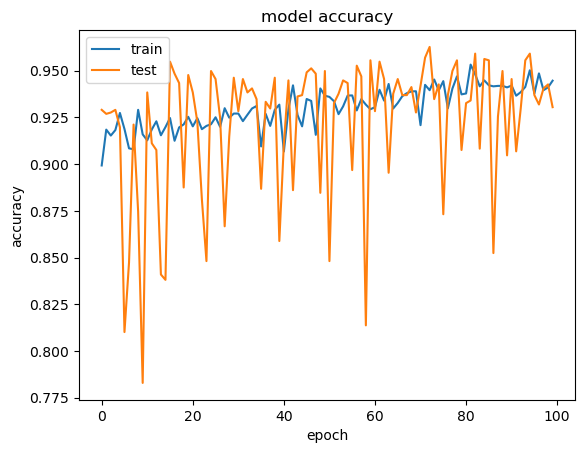

In [21]:
# summarize history for accuracy
plt.plot(pretrained.history['accuracy'])
plt.plot(pretrained.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

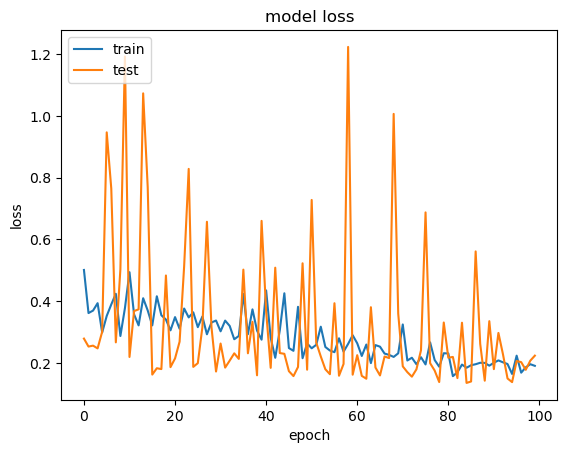

In [28]:
# summarize history for accuracy
plt.plot(pretrained.history['loss'])
plt.plot(pretrained.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
test_loss, test_acc = pretrained_model.evaluate(testSamples,  y_test, verbose=2)
print('\nTest loss: ', test_loss)
print('\nTest accuracy: ', test_acc)


146/146 - 0s - loss: 0.2261 - accuracy: 0.9330 - 330ms/epoch - 2ms/step

Test loss:  0.22609253227710724

Test accuracy:  0.9329608678817749


In [19]:
# test_loss, test_acc = transfer_model.evaluate(testSamples,  y_test, verbose=2)
# print('\nTest loss: ', test_loss)
# print('\nTest accuracy: ', test_acc)


NameError: name 'transfer_model' is not defined

## Predictions

### Squential

In [23]:


# Make predictions
# probability_model = tf.keras.Sequential([transfer_model, tf.keras.layers.Softmax()])
# y_predict = probability_model.predict(testSamples)
# # predictions = model.predict(X_test)


y_predict = pretrained_model.predict(testSamples)
print(y_predict)
y_pred = np.argmax(y_predict, axis = -1)


t =pd.DataFrame(y_pred)
t.value_counts()
# df_mean_test.feeling.value_counts()

from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_pred,testLabels1)
print('Confusion Matrix\n')
print(confusion)

146/146 [==============================] - 0s 2ms/step
[[3.3796003e-32 1.0000000e+00]
 [9.9999702e-01 3.0087310e-06]
 [5.7422767e-16 1.0000000e+00]
 ...
 [0.0000000e+00 1.0000000e+00]
 [4.0178474e-09 1.0000000e+00]
 [0.0000000e+00 1.0000000e+00]]
Confusion Matrix

[[2026   55]
 [ 257 2316]]


Accuracy: 0.9329608938547486
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      2283
           1       0.90      0.98      0.94      2371

    accuracy                           0.93      4654
   macro avg       0.94      0.93      0.93      4654
weighted avg       0.94      0.93      0.93      4654



Text(50.722222222222214, 0.5, 'Actual Values ')

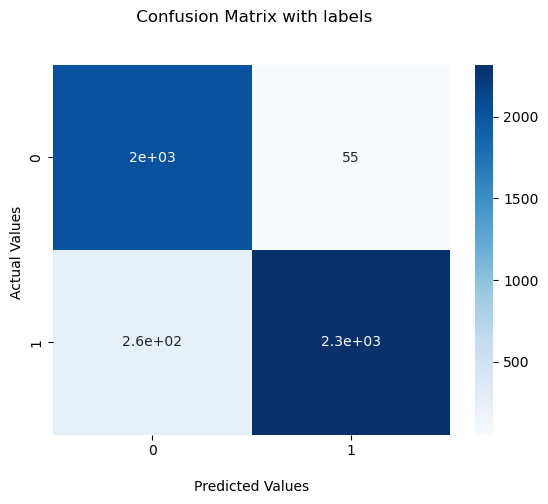

In [24]:


accuracy = accuracy_score(testLabels1, y_pred)
print("Accuracy:", accuracy)

report = classification_report(testLabels1, y_pred, zero_division=np.nan)
print("Classification Report:")
print(report)

# confusion = confusion_matrix(testLabels1, y_pred) # add normalize='pred' if want %
# print('Confusion Matrix\n')
# print(confusion)

ax = sns.heatmap(confusion, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

Transfer Model


In [ ]:


# Make predictions
# probability_model = tf.keras.Sequential([transfer_model, tf.keras.layers.Softmax()])
# y_predict = probability_model.predict(testSamples)
# # predictions = model.predict(X_test)


# y_predict = transfer_model.predict(testSamples)
# print(y_predict)
# y_pred = np.argmax(y_predict, axis = -1)


# t =pd.DataFrame(y_pred)
# t.value_counts()
# # df_mean_test.feeling.value_counts()

# from sklearn.metrics import confusion_matrix
# confusion = confusion_matrix(y_pred,testLabels1)
# print('Confusion Matrix\n')
# print(confusion)

In [ ]:
# accuracy = accuracy_score(testLabels1, y_pred)
# print("Accuracy:", accuracy)

# report = classification_report(testLabels1, y_pred, zero_division=np.nan)
# print("Classification Report:")
# print(report)

# confusion = confusion_matrix(testLabels1, y_pred) # add normalize='pred' if want %
# print('Confusion Matrix\n')
# print(confusion)

# ax = sns.heatmap(confusion, annot=True, cmap='Blues')

# ax.set_title(' Confusion Matrix with labels\n\n')
# ax.set_xlabel('\nPredicted Values')
# ax.set_ylabel('Actual Values ')

### Random Forest Classifier

Accuracy: 0.998495917490331
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2283
           1       1.00      1.00      1.00      2371

    accuracy                           1.00      4654
   macro avg       1.00      1.00      1.00      4654
weighted avg       1.00      1.00      1.00      4654



Text(50.722222222222214, 0.5, 'Actual Values ')

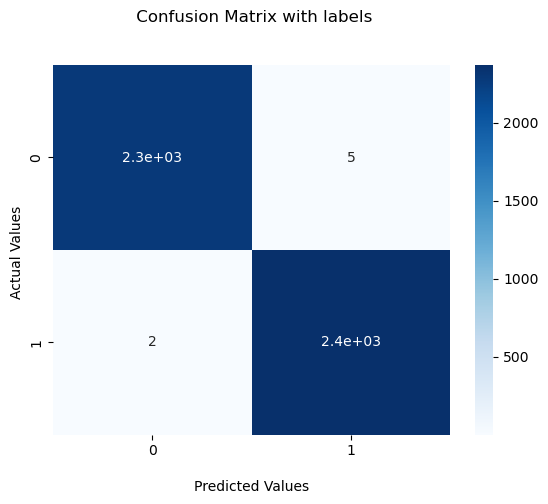

In [25]:
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_leaf=1, random_state=42)
rf_classifier.fit(trainSamples, y_train)
y_pred = rf_classifier.predict(testSamples)
y_roundedValue = np.argmax(y_pred, axis = -1)
# print(y_pred)
accuracy = accuracy_score(testLabels1, y_roundedValue)
print("Accuracy:", accuracy)

report = classification_report(testLabels1, y_roundedValue)
print("Classification Report:")
print(report)

result = confusion_matrix(testLabels1, y_roundedValue)

ax = sns.heatmap(result, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')



# result = confusion_matrix(y_test, y_pred , normalize='pred')
# print(classification_report(y_test, y_pred))

# disp = ConfusionMatrixDisplay(confusion_matrix=result)

# disp.plot(cmap=plt.cm.Blues)
# plt.show()

In [ ]:

# # Evaluate the model
# loss = transfer_model.evaluate(testSamples, y_test)
# print(f"Test Loss: {loss}")

# test_loss, test_acc = transfer_model.evaluate(testSamples,  y_test, verbose=2)
# print('\nTest loss: ', test_loss)
# print('\nTest accuracy: ', test_acc)


### Decision Tree Classifier

In [ ]:
# dt_classifier = DecisionTreeClassifier(random_state=42)
# dt_classifier.fit(trainSamples, y_train)
# y_pred = rf_classifier.predict(testSamples)
# y_roundedValue = np.argmax(y_pred, axis = -1)

# accuracy = accuracy_score(testLabels1, y_roundedValue)
# print("Accuracy:", accuracy)

# report = classification_report(testLabels1, y_roundedValue)
# print("Classification Report:")
# print(report)


# result = confusion_matrix(testLabels1, y_roundedValue)
# print(classification_report(y_test, y_predict))

# disp = ConfusionMatrixDisplay(confusion_matrix=result)

# disp.plot(cmap=plt.cm.Blues)
# plt.show()

### K Nearest Neighbors Classifier

Accuracy: 0.998495917490331
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2283
           1       1.00      1.00      1.00      2371

    accuracy                           1.00      4654
   macro avg       1.00      1.00      1.00      4654
weighted avg       1.00      1.00      1.00      4654

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2283
           1       1.00      1.00      1.00      2371

    accuracy                           1.00      4654
   macro avg       1.00      1.00      1.00      4654
weighted avg       1.00      1.00      1.00      4654



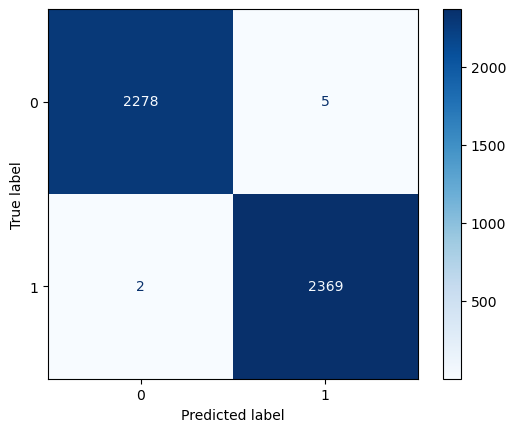

In [26]:
knn_classifier = KNeighborsClassifier(n_neighbors=1000)
knn_classifier.fit(trainSamples, y_train)
y_pred = rf_classifier.predict(testSamples)
y_roundedValue = np.argmax(y_pred, axis = -1)

accuracy = accuracy_score(testLabels1, y_roundedValue)
print("Accuracy:", accuracy)

report = classification_report(testLabels1, y_roundedValue)
print("Classification Report:")
print(report)


result = confusion_matrix(testLabels1, y_roundedValue)
print(classification_report(testLabels1, y_roundedValue))

disp = ConfusionMatrixDisplay(confusion_matrix=result)

disp.plot(cmap=plt.cm.Blues)
plt.show()

### Gradient Boosting Classifier

Accuracy: 0.998495917490331
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2283
           1       1.00      1.00      1.00      2371

    accuracy                           1.00      4654
   macro avg       1.00      1.00      1.00      4654
weighted avg       1.00      1.00      1.00      4654



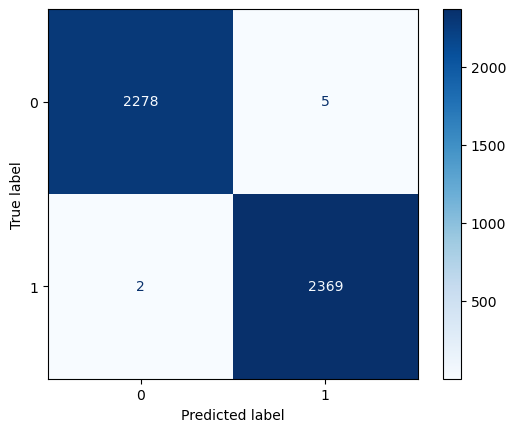

In [27]:
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_classifier.fit(trainSamples, trainlabels1)
y_pred = rf_classifier.predict(testSamples)
y_roundedValue = np.argmax(y_pred, axis = -1)

accuracy = accuracy_score(testLabels1, y_roundedValue)
print("Accuracy:", accuracy)

report = classification_report(testLabels1, y_roundedValue)
print("Classification Report:")
print(report)


result = confusion_matrix(testLabels1, y_roundedValue)


disp = ConfusionMatrixDisplay(confusion_matrix=result)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
# model.save('forTransferL.h5')